<a href="https://colab.research.google.com/github/anjaleeDS/DAT6-git-lab/blob/master/LendingClubHW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# declarations of libs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from numpy import nan_to_num
from vega_datasets import data
import numpy as np

pd.set_option('display.max_columns', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
sample_data/


In [0]:
%cd /gdrive/My\ Drive/Colab\ Notebooks/
%ls

/gdrive/My Drive/Colab Notebooks
 LendingClubHW02.ipynb   loan.csv  'OLD - lending club project.ipynb'


In [0]:
df = pd.read_csv("loan.csv")

# subset of small business loans
smb_df = df[df['purpose']=='small_business']

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
############ identify and drop some useless columns:

drop_list = ['dti_joint','annual_inc_joint', 'verification_status_joint', 'url', 'application_type', 'pymnt_plan', 'total_bal_il','pub_rec','policy_code']
# smb_df.loc[:,'open_acc'].value_counts()
# num_cols = smb_df.shape[1]
smb_small_df = smb_df

smb_small_df = smb_df.drop(drop_list, axis=1)
smb_small_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
   

# Preliminary charts: grade v loan amt and month v funded amt 

Text(0.5, 1.0, 'LC Grade A to Grade G is the highest amount')

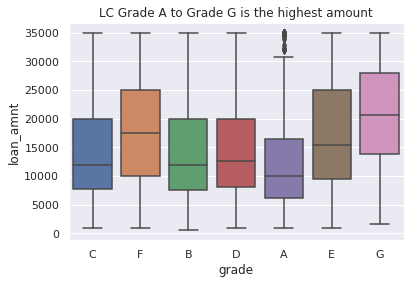

In [0]:
sns.boxplot(data=smb_df, y='loan_amnt', x='grade')
plt.title("LC Grade A to Grade G is the highest amount")

In [0]:
from time import gmtime, strptime
smb_df['year'] = pd.DatetimeIndex(smb_df['issue_d']).year
smb_df['month'] = pd.DatetimeIndex(smb_df['issue_d']).month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Funding amount looks consistent between months')

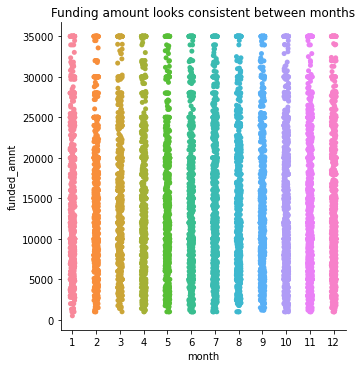

In [0]:
sns.catplot(data=smb_df, x='month', y='funded_amnt')
plt.title("Funding amount looks consistent between months")

Text(0.5, 1.0, 'Funding amount looks consistent between months')

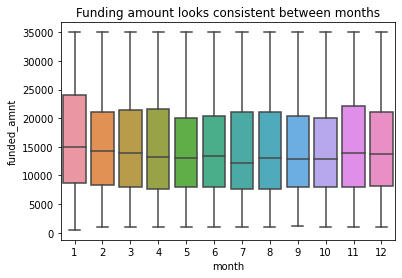

In [0]:
sns.boxplot(data=smb_df, x='month', y='funded_amnt')
plt.title("Funding amount looks consistent between months")

Text(0.5, 1.0, 'Simple Funding Amts per Month for Small Business Loans')

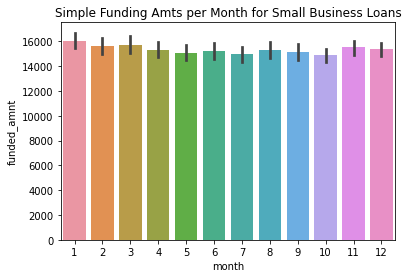

In [0]:
sns.barplot(data=smb_df, x='month', y='funded_amnt')
plt.title("Simple Funding Amts per Month for Small Business Loans")

# What's age got to do with it?
Using the earliest credit year to see if younger vs older people get the loans they want for small business

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Text(0.5, 1.0, 'Average Funded Amount by Age of Borrower for Small Business Loans')

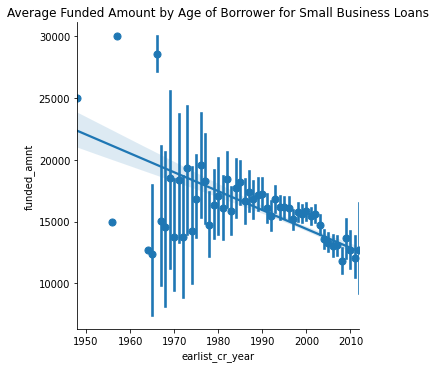

In [0]:
smb_df.loc[:,'earlist_cr_year'] = pd.DatetimeIndex(smb_df['earliest_cr_line']).year
smb_df.loc[:,'earlist_cr_month'] = pd.DatetimeIndex(smb_df['earliest_cr_line']).month


out = sns.lmplot(data=smb_df, x='earlist_cr_year', y='funded_amnt', robust=True, x_estimator=np.mean, )
plt.title("Average Funded Amount by Age of Borrower for Small Business Loans")

## wow ok there is almost a linear fit to age and funded amount
what about we look at the funded amt by different purposes?

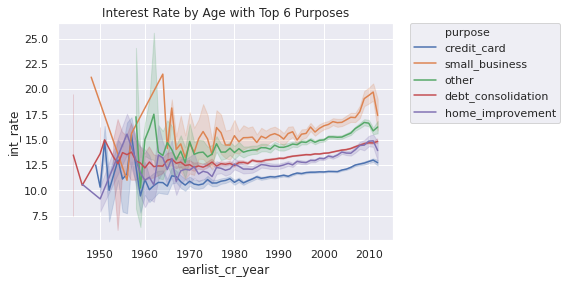

In [0]:
col_drop_list = ['dti_joint','annual_inc_joint', 'verification_status_joint', 'url', 'application_type', 'pymnt_plan', 'total_bal_il','pub_rec','policy_code']
top_purposes_small_df = df.drop(col_drop_list, axis=1)

top_purposes_small_df['earlist_cr_year'] = pd.DatetimeIndex(top_purposes_small_df['earliest_cr_line']).year
top_purposes_small_df['earlist_cr_month'] = pd.DatetimeIndex(top_purposes_small_df['earliest_cr_line']).month

top6_purposes = ['debt_consolidation','credit_card', 'home_improvement', 'other', 'small_business']
test = top_purposes_small_df[top_purposes_small_df['purpose'].isin(top6_purposes)]

sns.lineplot(data=test, x='earlist_cr_year', y='int_rate', hue='purpose')
plt.title("Interest Rate by Age with Top 6 Purposes")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

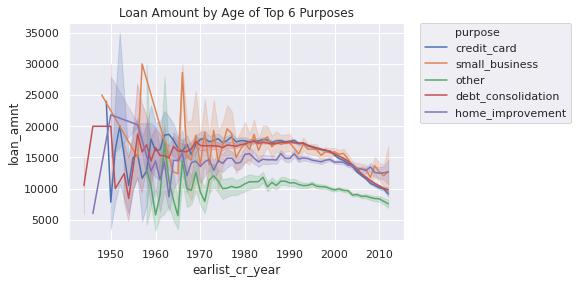

In [0]:
# What about the amount borrowed by Top 6 purpose?

sns.lineplot(data=test, x='earlist_cr_year', y='loan_amnt', hue='purpose')
plt.title("Loan Amount by Age of Top 6 Purposes")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# smb_df.loc[:,'earlist_cr_year'] = pd.DatetimeIndex(smb_df.loc[:,'earliest_cr_line']).year
# smb_df.loc[:,'earlist_cr_month'] = pd.DatetimeIndex(smb_df.loc[:,'earliest_cr_line']).month
# sns.jointplot(data=smb_df, x='earlist_cr_year', y='funded_amnt', kind="hex")
# plt.show()


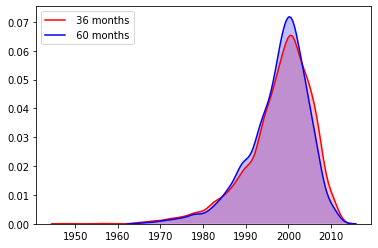

In [0]:
sns.kdeplot(smb_df.loc[(smb_df['term']==' 36 months'), 'earlist_cr_year'], color='r', shade=True, Label=' 36 months')
sns.kdeplot(smb_df.loc[(smb_df['term']==' 60 months'), 'earlist_cr_year'], color='b', shade=True, Label=' 60 months')

# Setting the X and Y Label 
# plt.xlabel('Earliest Credit Run') 
# plt.ylabel('') 

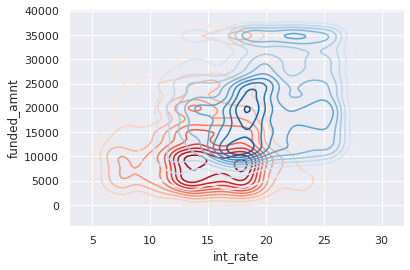

In [0]:
# Subset the smb dataset by loan terms
term36m = smb_df.loc[smb_df.term == " 36 months"]
term60m = smb_df.loc[smb_df.term == " 60 months"]

sns.set(style="darkgrid")

ax = sns.kdeplot(term36m.loc[:,'int_rate'], term36m.loc[:,'funded_amnt'], shade=False, cmap='Reds', shade_lowest=False)
ax = sns.kdeplot(term60m.loc[:,'int_rate'], term60m.loc[:,'funded_amnt'], shade=False, cmap='Blues',shade_lowest=False)
# ax = sns.kdeplot(term36m.loc[:,'int_rate'], term36m.loc[:,'funded_amnt'], shade=True, cmap='Reds')


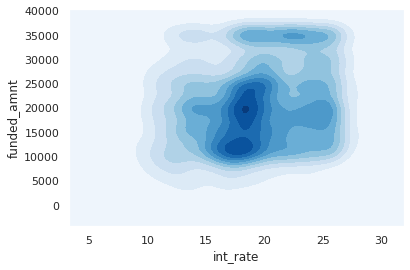

In [0]:
ax = sns.kdeplot(term60m.loc[:,'int_rate'], term60m.loc[:,'funded_amnt'], shade=True, cmap='Blues',shade_lowest=False)
